RAKESH KASIRE NADUKUDA

LGM_INTERMEDIATE_LEVEL_TASK


1.IMPORT LIBRARIES

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

2.READ DATA

In [34]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\Iris.csv")

In [35]:
d=data.copy()
d

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


3.STATISTICS OF DATA

In [36]:
d.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [37]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [38]:
d.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [39]:
d.shape

(150, 6)

In [40]:
d.drop("Id",axis=1,inplace=True)

In [41]:
d.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
d['Species'].value_counts

<bound method IndexOpsMixin.value_counts of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object>

In [43]:
d=d.replace(to_replace={'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
d['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

4.DATA VISUALIZATION

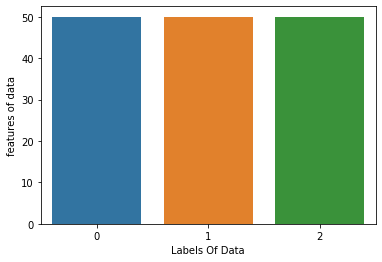

In [44]:
sns.countplot(x=d['Species'],data=d)
plt.xlabel("Labels Of Data")
plt.ylabel("features of data")
plt.show()


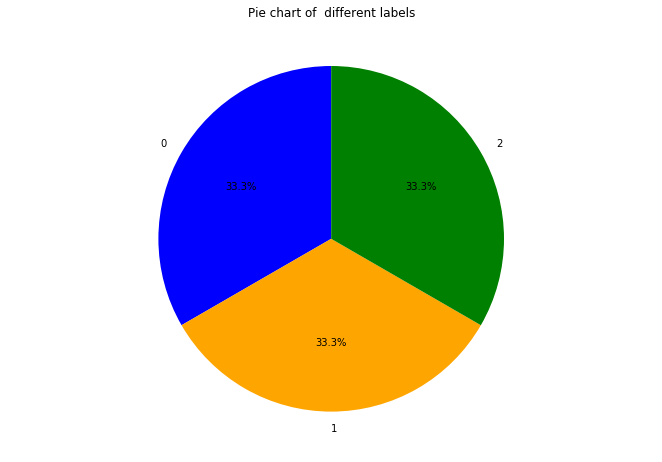

In [45]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
colors = ['blue','orange','green']
sp = d['Species'].unique()
ct = d['Species'].value_counts().tolist()
ax.pie(ct, labels = sp, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Pie chart of  different labels')
plt.show()

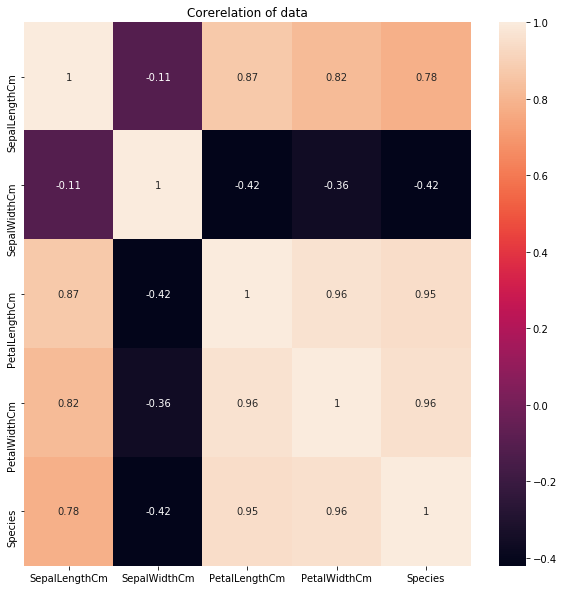

In [46]:
plt.figure(figsize=(10,10))
s=d.corr()
plt.title("Corerelation of data")
sns.heatmap(s,annot=True)
plt.show()

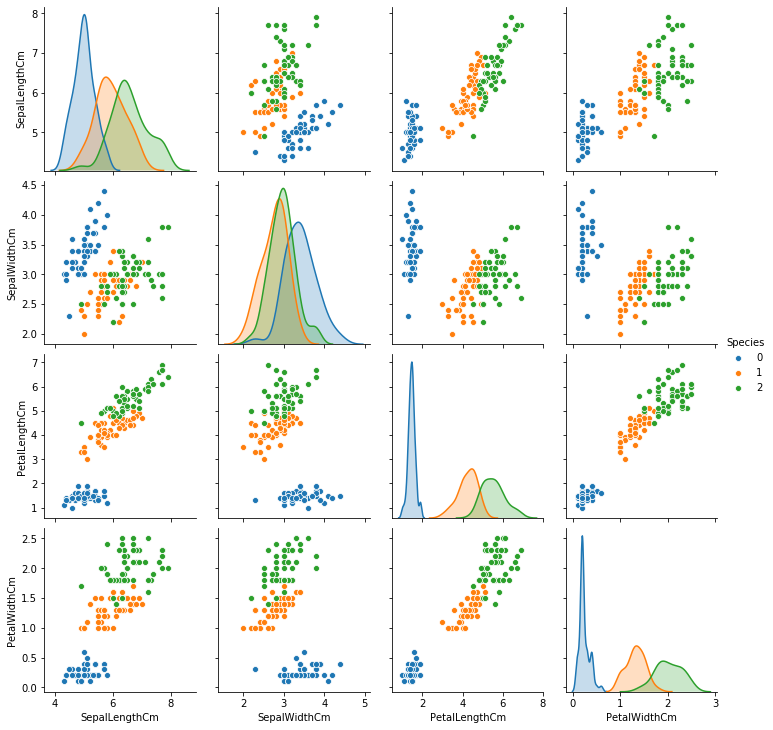

In [47]:
sns.pairplot(d,hue='Species')

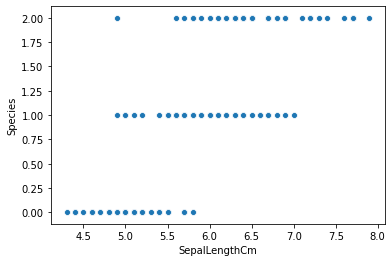

In [48]:
sns.scatterplot(x=d['SepalLengthCm'],y=d['Species'])

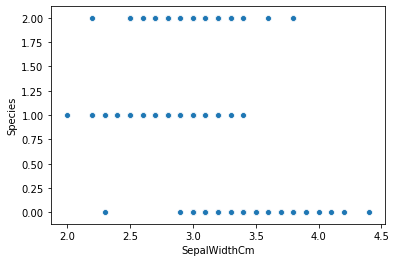

In [19]:
sns.scatterplot(x=d['SepalWidthCm'],y=d['Species'])


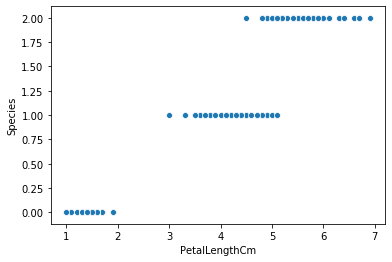

In [20]:
sns.scatterplot(x=d['PetalLengthCm'],y=d['Species'])

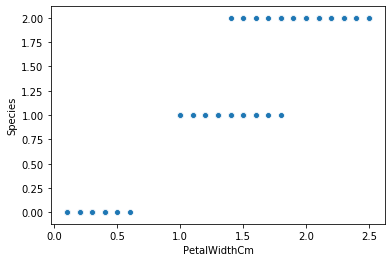

In [21]:
sns.scatterplot(x=d['PetalWidthCm'],y=d['Species'])

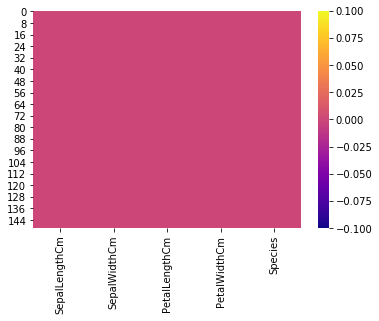

In [22]:
sns.heatmap(d.isnull(),cmap='plasma')

5.SPLIT FEATURES AND LABLES

In [23]:
X=d.drop('Species',axis=1).values
y=d['Species'].values

6.TRAIN AND TEST SPLIT DATA

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

7.FEATURE SCALING

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,0:4]=sc.fit_transform(X_train[:,0:4])
X_test[:,0:4]=sc.transform(X_test[:,0:4])

8.DECISIONTREE CLASSIFIER

In [26]:
from sklearn.tree import DecisionTreeClassifier

tre=DecisionTreeClassifier(criterion='entropy',random_state=0)
tre.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [28]:
y_pred=tre.predict(X_test)

9.FINDING ACCURACY SCORE, CONFUSION MATRIX AND CLASSIFICATION REPORT

In [29]:
accuracy_score(y_test, y_pred)

0.96

In [30]:
matrix= confusion_matrix(y_test, y_pred)
print(matrix)
print(classification_report(y_test, y_pred))

[[16  0  0]
 [ 0 18  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        15

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



10.PLOTTING THE DECISION TREE

In [31]:
from sklearn import tree

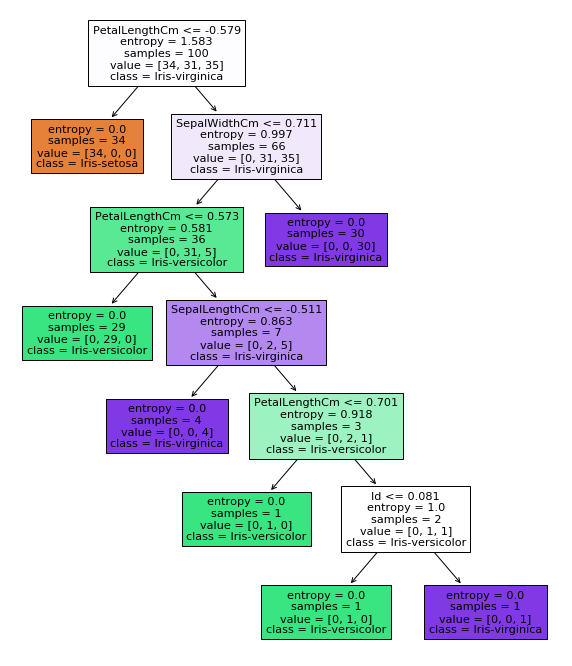

In [32]:
features = data.columns[:-1]
labels = data['Species'].unique().tolist()
from sklearn.tree import plot_tree
plt.figure(figsize=(10,12))
plot_tree(tre, feature_names=features, class_names=labels,filled=True)
plt.show()